In [99]:
import numpy as np
import pandas as pd
from collections import Counter

In [100]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [101]:
import warnings
warnings.filterwarnings('ignore')

In [102]:
train = pd.read_csv("train.csv")

In [103]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [104]:
campaign = pd.read_csv("campaign_data.csv")
campaign.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [105]:
coupons = pd.read_csv("coupon_item_mapping.csv")
coupons.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [106]:
customer_demo = pd.read_csv("customer_demographics.csv")
customer_demo.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [107]:
customer_tran = pd.read_csv("customer_transaction_data.csv")
customer_tran.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [108]:
items = pd.read_csv("item_data.csv")
items.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [109]:
test = pd.read_csv("test_QyjYwdj.csv")
test.head()

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


In [110]:
#changing the format to datetime
campaign['start_date'] = pd.to_datetime(campaign['start_date'], format = '%d/%m/%y')
campaign['end_date'] = pd.to_datetime(campaign['end_date'], format = '%d/%m/%y')

In [111]:
train['campaign_type'] = train.campaign_id.map(campaign.groupby('campaign_id').campaign_type.apply(lambda x: x.unique()[0]))
test['campaign_type'] = test.campaign_id.map(campaign.groupby('campaign_id').campaign_type.apply(lambda x: x.unique()[0]))

In [112]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type
0,1,13,27,1053,0,X
1,2,13,116,48,0,X
2,6,9,635,205,0,Y
3,7,13,644,1050,0,X
4,9,8,1017,1489,0,X


In [113]:
test.head()

,id,campaign_id,coupon_id,customer_id,campaign_type
0,3,22,869,967,X
1,4,20,389,1566,Y
2,5,22,981,510,X
3,8,25,1069,361,Y
4,10,17,498,811,Y


In [114]:
customer_demo.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [115]:
import re

In [116]:
#setting the data type of family_size and no_of_children
customer_demo['family_size'] = customer_demo.family_size.apply(lambda x: int(re.sub('\+', '', x)))
customer_demo['no_of_children'] = customer_demo.no_of_children.apply(lambda x: int(re.sub(
                                        '\+', '', x)) if pd.notna(x) else x)

In [117]:
customer_demo.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1.0,3
3,8,26-35,NaN,0,4,2.0,6
4,10,46-55,Single,0,1,NaN,5


In [118]:
#filling NAN values of marital_status
customer_demo.loc[pd.isnull(customer_demo.marital_status) & (customer_demo.family_size==1), 'marital_status'] = 'Single'
customer_demo.loc[pd.isnull(customer_demo.marital_status) & (customer_demo.family_size - customer_demo.no_of_children == 1), 'marital_status'] = 'Single'
customer_demo.loc[(pd.isnull(customer_demo.marital_status)) & ((customer_demo.family_size - customer_demo.no_of_children) == 2) & (pd.notnull(customer_demo.no_of_children)), 'marital_status'] = 'Married'
customer_demo.loc[pd.isnull(customer_demo.marital_status) & (pd.isnull(customer_demo.no_of_children)) & (customer_demo.family_size == 2), 'marital_status'] = 'Married'

In [119]:
customer_demo.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,Married,0,3,1.0,3
3,8,26-35,Married,0,4,2.0,6
4,10,46-55,Single,0,1,NaN,5


In [120]:
missing_value = customer_demo.isnull().sum()
missing_value[missing_value > 0]

no_of_children    538
dtype: int64

In [121]:
#Now we need to fill the missing values of no_of_children
customer_demo.loc[pd.isnull(customer_demo.no_of_children) & (customer_demo.marital_status == 'Married')
                 & (customer_demo.family_size == 2), 'no_of_children'] = 0.0
customer_demo.loc[pd.isnull(customer_demo.no_of_children) & (customer_demo.family_size == 1), 
                 'no_of_children'] = 0.0
customer_demo.loc[pd.isnull(customer_demo.no_of_children) & (customer_demo.family_size == 2), 
                 'no_of_children'] = 1.0

In [122]:
missing_value = customer_demo.isnull().sum()
missing_value[missing_value > 0]

Series([], dtype: int64)

In [123]:
#No more missing values now in customer_demo 

In [124]:
customer_tran.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [125]:
customer_tran['date'] = pd.to_datetime(customer_tran['date'])

In [126]:
#Merging train and test with customer_demo on customer_id
train = pd.merge(train, customer_demo, on='customer_id', how='left')
test = pd.merge(test, customer_demo, on='customer_id', how='left')

In [127]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,0,X,46-55,Single,0.0,1.0,0.0,5.0
1,2,13,116,48,0,X,36-45,Married,0.0,2.0,0.0,3.0
2,6,9,635,205,0,Y,46-55,Married,0.0,2.0,0.0,7.0
3,7,13,644,1050,0,X,NaN,NaN,NaN,NaN,NaN,NaN
4,9,8,1017,1489,0,X,46-55,Married,0.0,2.0,0.0,3.0


In [128]:
customer_tran['str_item'] = customer_tran.item_id.apply(lambda x: str(x))
cust2items = customer_tran.groupby('customer_id').str_item.apply(lambda x:
                                                ' '.join(x)).to_dict()
customer_tran.drop('str_item', axis=1, inplace=True)

In [129]:
coupons.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [130]:
coupon2items = coupons.groupby('coupon_id').item_id.apply(lambda x: ' '.join
                (list(x.apply(lambda x: str(x))))).to_dict()

In [131]:
customer_tran.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [132]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,0,X,46-55,Single,0.0,1.0,0.0,5.0
1,2,13,116,48,0,X,36-45,Married,0.0,2.0,0.0,3.0
2,6,9,635,205,0,Y,46-55,Married,0.0,2.0,0.0,7.0
3,7,13,644,1050,0,X,NaN,NaN,NaN,NaN,NaN,NaN
4,9,8,1017,1489,0,X,46-55,Married,0.0,2.0,0.0,3.0


In [133]:
train['bought'] = train[['coupon_id', 'customer_id']].apply(lambda x: len(
np.intersect1d(cust2items[x[1]].split(), coupon2items[x[0]].split())), axis=1)
test['bought'] = test[['coupon_id', 'customer_id']].apply(lambda x: len(
np.intersect1d(cust2items[x[1]].split(), coupon2items[x[0]].split())), axis=1)

In [134]:
train.head(25)

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,age_range,marital_status,rented,family_size,no_of_children,income_bracket,bought
0,1,13,27,1053,0,X,46-55,Single,0.0,1.0,0.0,5.0,0
1,2,13,116,48,0,X,36-45,Married,0.0,2.0,0.0,3.0,0
2,6,9,635,205,0,Y,46-55,Married,0.0,2.0,0.0,7.0,0
3,7,13,644,1050,0,X,NaN,NaN,NaN,NaN,NaN,NaN,0
4,9,8,1017,1489,0,X,46-55,Married,0.0,2.0,0.0,3.0,0
5,11,11,795,793,0,Y,46-55,Single,0.0,2.0,1.0,5.0,0
6,14,9,444,590,0,Y,36-45,Married,0.0,2.0,0.0,1.0,0
7,15,29,538,368,0,Y,36-45,Single,0.0,1.0,0.0,5.0,2
8,17,30,857,523,0,X,NaN,NaN,NaN,NaN,NaN,NaN,0
9,19,2,559,679,0,Y,36-45,Single,1.0,2.0,1.0,4.0,0


In [135]:
item2coupons = coupons.groupby('item_id').coupon_id.apply(lambda x: ' '.join(
                                list(x.apply(lambda x: str(x))))).to_dict()
customer_tran['redeem'] = customer_tran.coupon_discount.apply(lambda x: 
                                                    1 if x>0 else 0)
#per item redeemed history i.e. mapping item_ids to redeemed percentage
redeemed_history = ((customer_tran.groupby('item_id').redeem.sum() / customer_tran.groupby
                    ('item_id').redeem.count()) * 100).to_dict()

In [136]:
#to fill the missing values when items not present in test coupons
def item_redeem_func(x):
    for item in coupon2items[x].split():
        per = []
        try:
            per.append(redeemed_history[int(item)])

        except:
            pass
    k = [np.mean(per) if pd.isna(np.mean(per)) == False else 0]
    return k[0]

In [137]:
train['item_redeem'] = train.coupon_id.apply(item_redeem_func)
test['item_redeem'] = test.coupon_id.apply(item_redeem_func)

In [138]:
cust_redeemed_history = ((customer_tran.groupby('customer_id').redeem.sum() / customer_tran.groupby
                    ('customer_id').redeem.count()) * 100).to_dict()

In [139]:
train['cust_redeem'] = train.customer_id.map(cust_redeemed_history)
test['cust_redeem'] = test.customer_id.map(cust_redeemed_history)

In [140]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,age_range,marital_status,rented,family_size,no_of_children,income_bracket,bought,item_redeem,cust_redeem
0,1,13,27,1053,0,X,46-55,Single,0.0,1.0,0.0,5.0,0,0.0,0.0
1,2,13,116,48,0,X,36-45,Married,0.0,2.0,0.0,3.0,0,0.0,0.0
2,6,9,635,205,0,Y,46-55,Married,0.0,2.0,0.0,7.0,0,0.0,0.0
3,7,13,644,1050,0,X,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0
4,9,8,1017,1489,0,X,46-55,Married,0.0,2.0,0.0,3.0,0,0.0,0.0


In [141]:
print(train.shape)
print(test.shape)

(78369, 15)
(50226, 14)


In [142]:
for col in train.columns:
    print(col)

id
campaign_id
coupon_id
customer_id
redemption_status
campaign_type
age_range
marital_status
rented
family_size
no_of_children
income_bracket
bought
item_redeem
cust_redeem


In [143]:
for col in test.columns:
    print(col)

id
campaign_id
coupon_id
customer_id
campaign_type
age_range
marital_status
rented
family_size
no_of_children
income_bracket
bought
item_redeem
cust_redeem


In [144]:
#list of catagorical variables
s = (train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['campaign_type', 'age_range', 'marital_status']


In [145]:
#check number of unique catagorical data in each column
object_nunique = list(map(lambda col: train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('campaign_type', 2), ('marital_status', 2), ('age_range', 6)]

In [146]:
#calculating missing values
missing_value = train.isnull().sum()
missing_value[missing_value > 0]

age_range         34708
marital_status    34708
rented            34708
family_size       34708
no_of_children    34708
income_bracket    34708
dtype: int64

In [147]:
missing_value = test.isnull().sum()
missing_value[missing_value > 0]

age_range         19287
marital_status    19287
rented            19287
family_size       19287
no_of_children    19287
income_bracket    19287
dtype: int64

In [148]:
test.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,age_range,marital_status,rented,family_size,no_of_children,income_bracket,bought,item_redeem,cust_redeem
0,3,22,869,967,X,36-45,Single,0.0,1.0,0.0,5.0,7,0.0,0.0
1,4,20,389,1566,Y,26-35,Married,0.0,2.0,0.0,9.0,2,0.0,0.0
2,5,22,981,510,X,26-35,Single,0.0,2.0,1.0,1.0,0,0.0,0.0
3,8,25,1069,361,Y,18-25,Single,0.0,1.0,0.0,3.0,0,0.0,0.0
4,10,17,498,811,Y,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0


In [149]:
#Filling the NANs in rented
train.rented.fillna(2, inplace=True)
test.rented.fillna(2, inplace=True)

In [150]:
#Aggregating the age range and filling the NANs in age_range
train['age_range'] = ['21' if x == '18-25' else x for x in train['age_range']]
train['age_range'] = ['30' if x == '26-35' else x for x in train['age_range']]
train['age_range'] = ['40' if x == '36-45' else x for x in train['age_range']]
train['age_range'] = ['50' if x == '46-55' else x for x in train['age_range']]
train['age_range'] = ['63' if x == '56-70' else x for x in train['age_range']]
train['age_range'] = ['85' if x == '70+' else x for x in train['age_range']]

test['age_range'] = ['21' if x == '18-25' else x for x in test['age_range']]
test['age_range'] = ['30' if x == '26-35' else x for x in test['age_range']]
test['age_range'] = ['40' if x == '36-45' else x for x in test['age_range']]
test['age_range'] = ['50' if x == '46-55' else x for x in test['age_range']]
test['age_range'] = ['63' if x == '56-70' else x for x in test['age_range']]
test['age_range'] = ['85' if x == '70+' else x for x in test['age_range']]

In [151]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,age_range,marital_status,rented,family_size,no_of_children,income_bracket,bought,item_redeem,cust_redeem
0,1,13,27,1053,0,X,50,Single,0.0,1.0,0.0,5.0,0,0.0,0.0
1,2,13,116,48,0,X,40,Married,0.0,2.0,0.0,3.0,0,0.0,0.0
2,6,9,635,205,0,Y,50,Married,0.0,2.0,0.0,7.0,0,0.0,0.0
3,7,13,644,1050,0,X,NaN,NaN,2.0,NaN,NaN,NaN,0,0.0,0.0
4,9,8,1017,1489,0,X,50,Married,0.0,2.0,0.0,3.0,0,0.0,0.0


In [152]:
test.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,age_range,marital_status,rented,family_size,no_of_children,income_bracket,bought,item_redeem,cust_redeem
0,3,22,869,967,X,40,Single,0.0,1.0,0.0,5.0,7,0.0,0.0
1,4,20,389,1566,Y,30,Married,0.0,2.0,0.0,9.0,2,0.0,0.0
2,5,22,981,510,X,30,Single,0.0,2.0,1.0,1.0,0,0.0,0.0
3,8,25,1069,361,Y,21,Single,0.0,1.0,0.0,3.0,0,0.0,0.0
4,10,17,498,811,Y,NaN,NaN,2.0,NaN,NaN,NaN,0,0.0,0.0


In [153]:
train.age_range.fillna(train['age_range'].median(), inplace=True)
test.age_range.fillna(test['age_range'].median(), inplace=True)

In [154]:
#filling the NANs in income_bracket 
train.income_bracket.fillna(train['income_bracket'].median(), inplace=True)
test.income_bracket.fillna(test['income_bracket'].median(), inplace=True)

In [155]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,age_range,marital_status,rented,family_size,no_of_children,income_bracket,bought,item_redeem,cust_redeem
0,1,13,27,1053,0,X,50,Single,0.0,1.0,0.0,5.0,0,0.0,0.0
1,2,13,116,48,0,X,40,Married,0.0,2.0,0.0,3.0,0,0.0,0.0
2,6,9,635,205,0,Y,50,Married,0.0,2.0,0.0,7.0,0,0.0,0.0
3,7,13,644,1050,0,X,50,NaN,2.0,NaN,NaN,5.0,0,0.0,0.0
4,9,8,1017,1489,0,X,50,Married,0.0,2.0,0.0,3.0,0,0.0,0.0


In [156]:
train.dtypes

id                     int64
campaign_id            int64
coupon_id              int64
customer_id            int64
redemption_status      int64
campaign_type         object
age_range             object
marital_status        object
rented               float64
family_size          float64
no_of_children       float64
income_bracket       float64
bought                 int64
item_redeem          float64
cust_redeem          float64
dtype: object

In [157]:
train.age_range = pd.to_numeric(train.age_range)
test.age_range = pd.to_numeric(test.age_range)

In [158]:
train.dtypes

id                     int64
campaign_id            int64
coupon_id              int64
customer_id            int64
redemption_status      int64
campaign_type         object
age_range            float64
marital_status        object
rented               float64
family_size          float64
no_of_children       float64
income_bracket       float64
bought                 int64
item_redeem          float64
cust_redeem          float64
dtype: object

In [159]:
gp_train = train.groupby(['marital_status'])
gp_median_train = gp_train.median()

gp_test = test.groupby(['marital_status'])
gp_median_test = gp_test.median()

In [160]:
gp_median_train

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,rented,family_size,no_of_children,income_bracket,bought,item_redeem,cust_redeem
marital_status,,,,,,,,,,,,,
Married,64060,12,603,732,0,40.0,0.0,2.0,0.0,5.0,0,0.0,0.0
Single,64117,13,598,795,0,50.0,0.0,1.0,0.0,4.0,0,0.0,0.0


In [161]:
gp_median_test

,id,campaign_id,coupon_id,customer_id,age_range,rented,family_size,no_of_children,income_bracket,bought,item_redeem,cust_redeem
marital_status,,,,,,,,,,,,
Married,64185,18,599,755,40.0,0.0,2.0,0.0,5.0,0,0.0,0.0
Single,64302,18,596,865,40.0,0.0,1.0,0.0,4.0,0,0.0,0.0


In [162]:
#Filling the NANs of marital_status
train.loc[pd.isnull(train.marital_status) & (train.age_range > 40), 'marital_status'] = 'Married'
train.loc[pd.isnull(train.marital_status) & (train.age_range < 40), 'marital_status'] = 'Single'
test.loc[pd.isnull(test.marital_status) & (test.age_range > 50), 'marital_status'] = 'Married'
test.loc[pd.isnull(test.marital_status) & (test.age_range < 50), 'marital_status'] = 'Single'

In [163]:
#Filling the NANs of family_size
train.loc[pd.isnull(train.family_size) & (train.age_range > 40), 'family_size'] = 2.0
train.loc[pd.isnull(train.family_size) & (train.age_range < 40), 'family_size'] = 1.0
test.loc[pd.isnull(test.family_size) & (test.age_range > 50), 'family_size'] = 2.0
test.loc[pd.isnull(test.family_size) & (test.age_range < 50), 'family_size'] = 1.0

In [164]:
missing_value = train.isnull().sum()
missing_value[missing_value > 0]

no_of_children    34708
dtype: int64

In [165]:
missing_value = test.isnull().sum()
missing_value[missing_value > 0]

no_of_children    19287
dtype: int64

In [166]:
#Filling the NANs of no_of_children
train.loc[pd.isnull(train.no_of_children) & (train.marital_status == 'Married')
                 & (train.family_size == 2), 'no_of_children'] = 0.0
train.loc[pd.isnull(train.no_of_children) & (train.family_size == 1), 
                 'no_of_children'] = 0.0
train.loc[pd.isnull(train.no_of_children) & (train.family_size == 2), 
                 'no_of_children'] = 1.0

test.loc[pd.isnull(test.no_of_children) & (test.marital_status == 'Married')
                 & (test.family_size == 2), 'no_of_children'] = 0.0
test.loc[pd.isnull(test.no_of_children) & (test.family_size == 1), 
                 'no_of_children'] = 0.0
test.loc[pd.isnull(test.no_of_children) & (test.family_size == 2), 
                 'no_of_children'] = 1.0

In [167]:
missing_value = train.isnull().sum()
missing_value[missing_value > 0]

Series([], dtype: int64)

In [168]:
missing_value = test.isnull().sum()
missing_value[missing_value > 0]

Series([], dtype: int64)

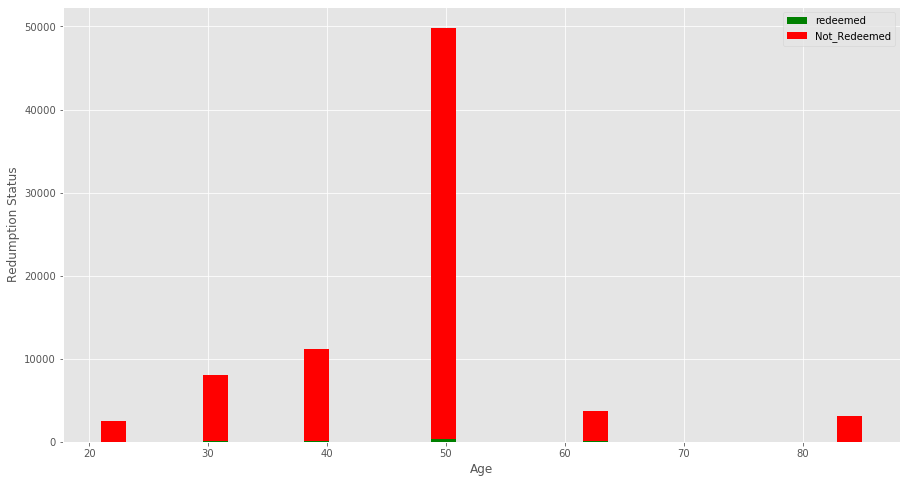

In [169]:
#plot to show relationships
df = train
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['redemption_status']==1]['age_range'], df[df['redemption_status']==0]['age_range']], stacked=True, color = ['g','r'],
         bins = 30, label = ['redeemed', 'Not_Redeemed'])
plt.xlabel('Age')
plt.ylabel('Redumption Status')
plt.legend()

In [170]:
#array's containing common customer_ids and coupon_ids in train,test in order to make validation set
commom_cust = np.intersect1d(train.customer_id.unique(),test.customer_id.unique())
commom_coup = np.intersect1d(train.coupon_id.unique(),test.coupon_id.unique())

In [171]:
#adding col to see whether custome and coupons is in test or not 
train['test_cust'] = train.customer_id.apply(lambda x: 1 if x in commom_cust else 0)
train['test_coup'] = train.coupon_id.apply(lambda x: 1 if x in commom_coup else 0)

In [172]:
train = train.dropna(axis=1).drop(['test_cust','test_coup'], axis=1)

In [173]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,age_range,marital_status,rented,family_size,no_of_children,income_bracket,bought,item_redeem,cust_redeem
0,1,13,27,1053,0,X,50.0,Single,0.0,1.0,0.0,5.0,0,0.0,0.0
1,2,13,116,48,0,X,40.0,Married,0.0,2.0,0.0,3.0,0,0.0,0.0
2,6,9,635,205,0,Y,50.0,Married,0.0,2.0,0.0,7.0,0,0.0,0.0
3,7,13,644,1050,0,X,50.0,Married,2.0,2.0,0.0,5.0,0,0.0,0.0
4,9,8,1017,1489,0,X,50.0,Married,0.0,2.0,0.0,3.0,0,0.0,0.0


In [174]:
print(train.shape)
print(test.shape)

(78369, 15)
(50226, 14)


In [175]:
dummy1 = pd.get_dummies(train['marital_status'], prefix='Status')
dummy2 = pd.get_dummies(test['marital_status'], prefix='Status')
train = pd.concat([train, dummy1], axis=1)
test = pd.concat([test, dummy2], axis=1)

In [176]:
train.drop('marital_status', inplace=True, axis=1)
test.drop('marital_status', inplace=True, axis=1)

In [177]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,age_range,rented,family_size,no_of_children,income_bracket,bought,item_redeem,cust_redeem,Status_Married,Status_Single
0,1,13,27,1053,0,X,50.0,0.0,1.0,0.0,5.0,0,0.0,0.0,0,1
1,2,13,116,48,0,X,40.0,0.0,2.0,0.0,3.0,0,0.0,0.0,1,0
2,6,9,635,205,0,Y,50.0,0.0,2.0,0.0,7.0,0,0.0,0.0,1,0
3,7,13,644,1050,0,X,50.0,2.0,2.0,0.0,5.0,0,0.0,0.0,1,0
4,9,8,1017,1489,0,X,50.0,0.0,2.0,0.0,3.0,0,0.0,0.0,1,0


In [178]:
test.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,age_range,rented,family_size,no_of_children,income_bracket,bought,item_redeem,cust_redeem,Status_Married,Status_Single
0,3,22,869,967,X,40.0,0.0,1.0,0.0,5.0,7,0.0,0.0,0,1
1,4,20,389,1566,Y,30.0,0.0,2.0,0.0,9.0,2,0.0,0.0,1,0
2,5,22,981,510,X,30.0,0.0,2.0,1.0,1.0,0,0.0,0.0,0,1
3,8,25,1069,361,Y,21.0,0.0,1.0,0.0,3.0,0,0.0,0.0,0,1
4,10,17,498,811,Y,40.0,2.0,1.0,0.0,5.0,0,0.0,0.0,0,1


In [179]:
train.dtypes

id                     int64
campaign_id            int64
coupon_id              int64
customer_id            int64
redemption_status      int64
campaign_type         object
age_range            float64
rented               float64
family_size          float64
no_of_children       float64
income_bracket       float64
bought                 int64
item_redeem          float64
cust_redeem          float64
Status_Married         uint8
Status_Single          uint8
dtype: object

In [180]:
train['campaign_type'] = train.campaign_type.map({'X':0,'Y':1})
test['campaign_type'] = test.campaign_type.map({'X':0,'Y':1})

In [181]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,age_range,rented,family_size,no_of_children,income_bracket,bought,item_redeem,cust_redeem,Status_Married,Status_Single
0,1,13,27,1053,0,0,50.0,0.0,1.0,0.0,5.0,0,0.0,0.0,0,1
1,2,13,116,48,0,0,40.0,0.0,2.0,0.0,3.0,0,0.0,0.0,1,0
2,6,9,635,205,0,1,50.0,0.0,2.0,0.0,7.0,0,0.0,0.0,1,0
3,7,13,644,1050,0,0,50.0,2.0,2.0,0.0,5.0,0,0.0,0.0,1,0
4,9,8,1017,1489,0,0,50.0,0.0,2.0,0.0,3.0,0,0.0,0.0,1,0


In [182]:
train.campaign_type = pd.to_numeric(train.campaign_type)
test.campaign_type = pd.to_numeric(test.campaign_type)

In [183]:
train.dtypes

id                     int64
campaign_id            int64
coupon_id              int64
customer_id            int64
redemption_status      int64
campaign_type          int64
age_range            float64
rented               float64
family_size          float64
no_of_children       float64
income_bracket       float64
bought                 int64
item_redeem          float64
cust_redeem          float64
Status_Married         uint8
Status_Single          uint8
dtype: object

In [184]:
targets = train.redemption_status
train.drop('redemption_status', inplace=True, axis=1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

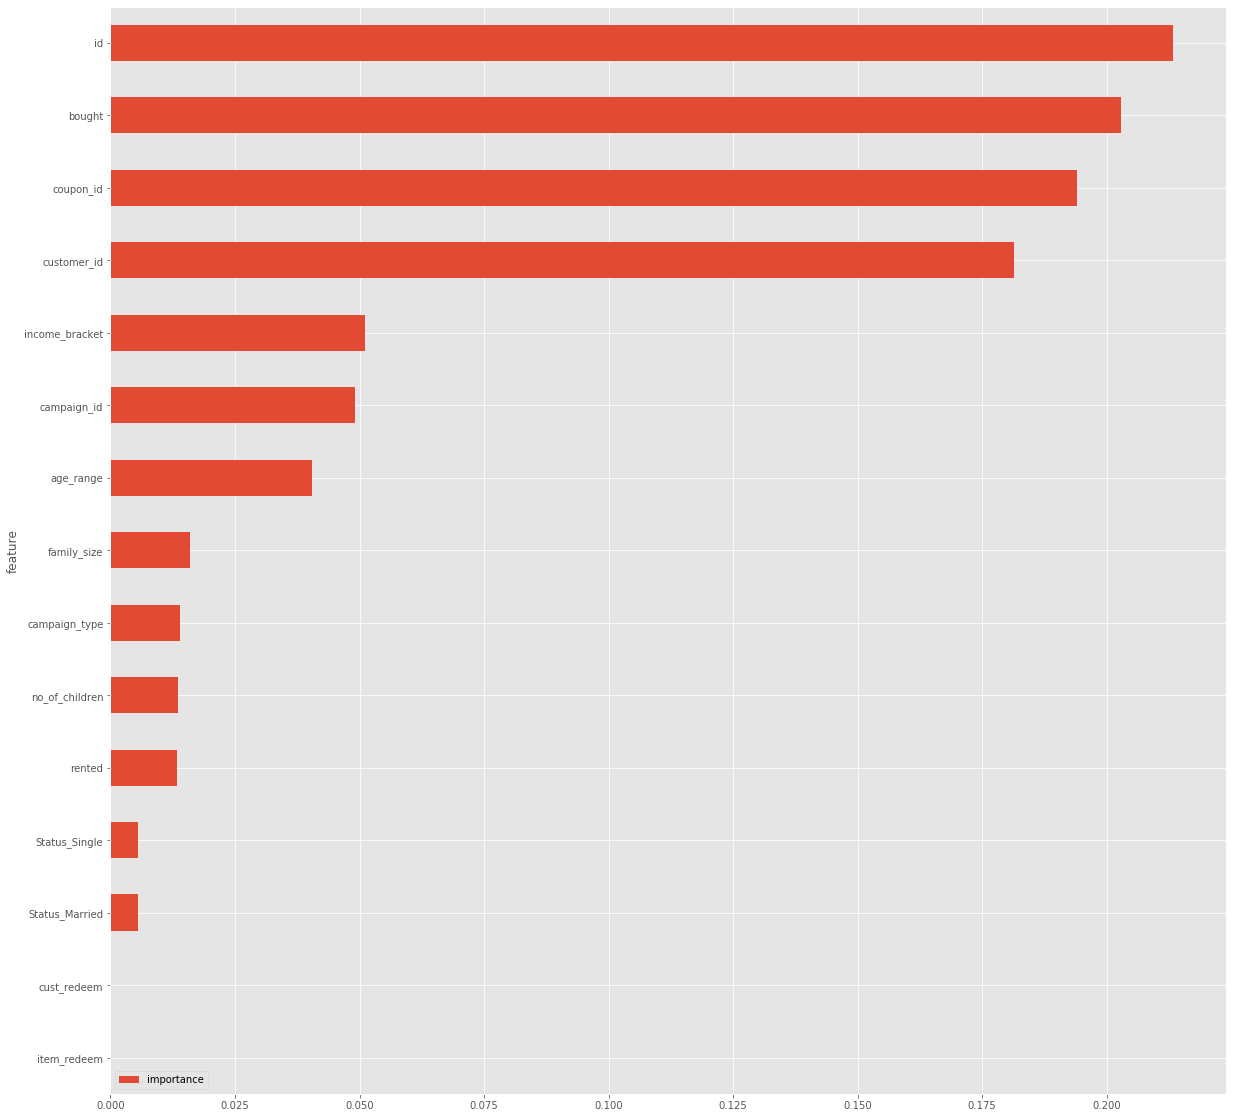

In [185]:
#To determine the important features
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(20, 20))

In [189]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [190]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring = scoring)
    return np.mean(xval)

In [191]:
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [1, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(targets, n_folds=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

In [192]:
compute_score(model, train, targets, scoring='accuracy')

0.9906978531124263